In [1]:
# 모두의 딥러닝

In [2]:
# 16장 이미지인식의 꽃, 컨볼루션신경망 (CNN)

In [3]:
# 16-1 이미지를 인식하는 원리

In [6]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import sys 

In [7]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [8]:
print("학습셋 이미지 수:  %d개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d개" % (X_test.shape[0]))

학습셋 이미지 수:  60000개
테스트셋 이미지 수 : 10000개


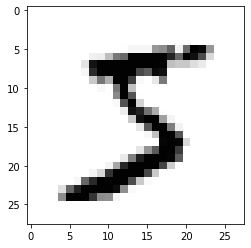

In [10]:
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [11]:
for x in X_train[0]:
  for i in x:
    sys.stdout.write("%-3s" % i)
  sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [12]:
# 2차원배열을 1차원배열로
X_train = X_train.reshape(X_train.shape[0], 784)

In [13]:
# 정규화
X_train = X_train.astype('float64')
X_train = X_train / 255

In [14]:
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

In [15]:
print("class : %d" % (y_train[0]))

class : 5


In [16]:
# 원-핫 인코딩

In [17]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [18]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# 16-2 딥러닝 기본 프레임 만들기

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [22]:
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
modelpath = "MNIST_MLP.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [25]:
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])


Epoch 1: val_loss improved from inf to 0.19062, saving model to MNIST_MLP.hdf5

Epoch 2: val_loss improved from 0.19062 to 0.14915, saving model to MNIST_MLP.hdf5

Epoch 3: val_loss improved from 0.14915 to 0.11383, saving model to MNIST_MLP.hdf5

Epoch 4: val_loss improved from 0.11383 to 0.10127, saving model to MNIST_MLP.hdf5

Epoch 5: val_loss improved from 0.10127 to 0.09986, saving model to MNIST_MLP.hdf5

Epoch 6: val_loss improved from 0.09986 to 0.08925, saving model to MNIST_MLP.hdf5

Epoch 7: val_loss improved from 0.08925 to 0.08853, saving model to MNIST_MLP.hdf5

Epoch 8: val_loss improved from 0.08853 to 0.08164, saving model to MNIST_MLP.hdf5

Epoch 9: val_loss did not improve from 0.08164

Epoch 10: val_loss did not improve from 0.08164

Epoch 11: val_loss improved from 0.08164 to 0.08071, saving model to MNIST_MLP.hdf5

Epoch 12: val_loss did not improve from 0.08071

Epoch 13: val_loss did not improve from 0.08071

Epoch 14: val_loss did not improve from 0.08071

Ep

In [26]:
print("\n Test Accuracy: %4f" % (model.evaluate(X_test, y_test)[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.0677 - accuracy: 0.9822

 Test Accuracy: 0.982200


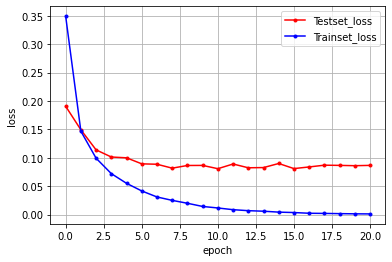

In [28]:
import numpy as np

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label="Testset_loss")
plt.plot(x_len, y_loss, marker='.', c="blue", label="Trainset_loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [29]:
# 16-5 컨볼루션 신경망 실행하기

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_2 (Flatten)         (None, 9216)              0         
                                                                 
 dense_3 (Dense)             (None, 128)               1179776   
                                                      

In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
modelpath = "MNIST_CNN.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [8]:
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])


Epoch 1: val_loss improved from inf to 0.08308, saving model to MNIST_CNN.hdf5

Epoch 2: val_loss improved from 0.08308 to 0.06559, saving model to MNIST_CNN.hdf5

Epoch 3: val_loss improved from 0.06559 to 0.05238, saving model to MNIST_CNN.hdf5

Epoch 4: val_loss improved from 0.05238 to 0.05189, saving model to MNIST_CNN.hdf5

Epoch 5: val_loss improved from 0.05189 to 0.04570, saving model to MNIST_CNN.hdf5

Epoch 6: val_loss improved from 0.04570 to 0.04485, saving model to MNIST_CNN.hdf5

Epoch 7: val_loss improved from 0.04485 to 0.04326, saving model to MNIST_CNN.hdf5

Epoch 8: val_loss did not improve from 0.04326

Epoch 9: val_loss improved from 0.04326 to 0.03976, saving model to MNIST_CNN.hdf5

Epoch 10: val_loss did not improve from 0.03976

Epoch 11: val_loss did not improve from 0.03976

Epoch 12: val_loss did not improve from 0.03976

Epoch 13: val_loss did not improve from 0.03976

Epoch 14: val_loss did not improve from 0.03976

Epoch 15: val_loss did not improve fro

In [9]:
print("\/n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.0307 - accuracy: 0.9922
\/n Test Accuracy: 0.9922


In [10]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

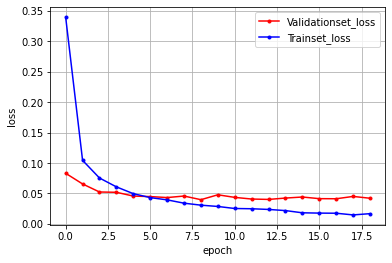

In [16]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label="Validationset_loss")
plt.plot(x_len, y_loss, marker='.', c="blue", label="Trainset_loss")
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()